# 0. Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Check the directory
!ls "/content/gdrive/My Drive/Colab Notebooks"

'Activity5.1 6288014 Sathita.ipynb'  'Lecture 9'
 CheckSum.ipynb			      LSTM2.ipynb
'Copy of food_dataset.zip'	      lstm_github.ipynb
 covid_project_014_083_145.ipynb      LSTM_Test.ipynb
 data				      Milestone2.ipynb
 Datacombell.ipynb		      mm_sec3.ipynb
 HW3-_6288104_Waipop.ipynb	     'phase2 (1).ipynb'
 IR_Machine_Learning		      project_014_083_145.ipynb
'Lecture 10'			      testproject2.ipynb
'Lecture 5'			      testproject.ipynb
'Lecture 6'			      Untitled0.ipynb
'Lecture 7'			      Untitled1.ipynb


In [ ]:
# Data directory
# data_dir = '/Users/thanwaratwongthongtham/Desktop/ICT/Special Topic/'
# data_dir = '/Users/thanwaratwongthongtham/Desktop/'
data_dir = '/content/gdrive/Shareddrives/ComSci🐢/dataset'

!ls '$data_dir'

new_data_clean.csv	     owid-covid-data-clean.csv
owid-covid-data-clean22.csv  owid-covid-data.csv


# 1. Prepare Environment

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Load Dataset

https://github.com/owid/covid-19-data/tree/master/public/data

In [ ]:
data_path = os.path.join(data_dir, 'owid-covid-data.csv')
df = pd.read_csv(data_path)

In [ ]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167703,ZWE,Africa,Zimbabwe,2022-03-07,239710.0,501.0,475.714,5399.0,0.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
167704,ZWE,Africa,Zimbabwe,2022-03-08,240343.0,633.0,496.000,5400.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
167705,ZWE,Africa,Zimbabwe,2022-03-09,240343.0,0.0,405.714,5400.0,0.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
167706,ZWE,Africa,Zimbabwe,2022-03-10,241548.0,1205.0,577.857,5408.0,8.0,1.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [ ]:
df.columns #list columns' names

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [ ]:
df['continent'].value_counts()

Africa           39747
Europe           37396
Asia             36488
North America    25135
South America     9595
Oceania           9313
Name: continent, dtype: int64

In [ ]:
df['location'].value_counts()

Argentina       801
Mexico          801
Thailand        798
Taiwan          786
China           780
               ... 
Turkmenistan    183
Tuvalu          179
Niue            157
Tokelau         114
Pitcairn         85
Name: location, Length: 238, dtype: int64

In [ ]:
# Filter out country and focus on neighbor country
filter_country = df[df['location'] == 'Cambodia'].append(df[df['location'] == 'Laos']).append(df[df['location'] == 'Malaysia']).append(df[df['location'] == 'Myanmar']).append(df[df['location'] == 'Thailand'])  

In [ ]:
data_df = filter_country
data_df['location'].value_counts()

Thailand    798
Malaysia    778
Cambodia    775
Laos        718
Myanmar     715
Name: location, dtype: int64

# 3. Data Preparation

In this section, we will prepare the dataset into a format that can be used to train models.

In [ ]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

iso_code - 0%
continent - 6%
location - 0%
date - 0%
total_cases - 2%
new_cases - 2%
new_cases_smoothed - 3%
total_deaths - 12%
new_deaths - 12%
new_deaths_smoothed - 14%
total_cases_per_million - 2%
new_cases_per_million - 2%
new_cases_smoothed_per_million - 4%
total_deaths_per_million - 13%
new_deaths_per_million - 13%
new_deaths_smoothed_per_million - 14%
reproduction_rate - 24%
icu_patients - 86%
icu_patients_per_million - 86%
hosp_patients - 85%
hosp_patients_per_million - 85%
weekly_icu_admissions - 97%
weekly_icu_admissions_per_million - 97%
weekly_hosp_admissions - 93%
weekly_hosp_admissions_per_million - 93%
total_tests - 58%
new_tests - 59%
total_tests_per_thousand - 58%
new_tests_per_thousand - 59%
new_tests_smoothed - 49%
new_tests_smoothed_per_thousand - 49%
positive_rate - 52%
tests_per_case - 53%
tests_units - 48%
total_vaccinations - 73%
people_vaccinated - 74%
people_fully_vaccinated - 76%
total_boosters - 89%
new_vaccinations - 78%
new_vaccinations_smoothed - 49%
tota

## 3.1 Feature Selection




Which feature should we use?

In [ ]:
data_df = filter_country[['location','date','total_cases',
                    'new_cases','total_deaths','new_deaths',
                    'total_vaccinations','people_vaccinated','people_fully_vaccinated',
                    'total_boosters','new_vaccinations',
                    'stringency_index','population_density',
                    'median_age','gdp_per_capita'
                    ]]
data_df

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,stringency_index,population_density,median_age,gdp_per_capita
25852,Cambodia,2020-01-27,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,90.672,25.6,3645.070
25853,Cambodia,2020-01-28,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,90.672,25.6,3645.070
25854,Cambodia,2020-01-29,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,90.672,25.6,3645.070
25855,Cambodia,2020-01-30,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,90.672,25.6,3645.070
25856,Cambodia,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,90.672,25.6,3645.070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150346,Thailand,2022-03-07,3066800.0,18943.0,23369.0,69.0,124950678.0,53989200.0,49796832.0,21164646.0,138219.0,NaN,135.132,40.1,16277.671
150347,Thailand,2022-03-08,3088873.0,22073.0,23438.0,69.0,125104784.0,54042657.0,49812870.0,21249257.0,154106.0,NaN,135.132,40.1,16277.671
150348,Thailand,2022-03-09,3111857.0,22984.0,23512.0,74.0,125283740.0,54112638.0,49830021.0,21341081.0,178956.0,NaN,135.132,40.1,16277.671
150349,Thailand,2022-03-10,3136649.0,24792.0,23575.0,63.0,125497170.0,54207124.0,49849223.0,21440823.0,213430.0,NaN,135.132,40.1,16277.671


In [ ]:
data_df.isnull().sum()

location                      0
date                          0
total_cases                  19
new_cases                    21
total_deaths                934
new_deaths                  937
total_vaccinations         2573
people_vaccinated          2560
people_fully_vaccinated    2587
total_boosters             3183
new_vaccinations           2670
stringency_index             64
population_density            0
median_age                    0
gdp_per_capita                0
dtype: int64

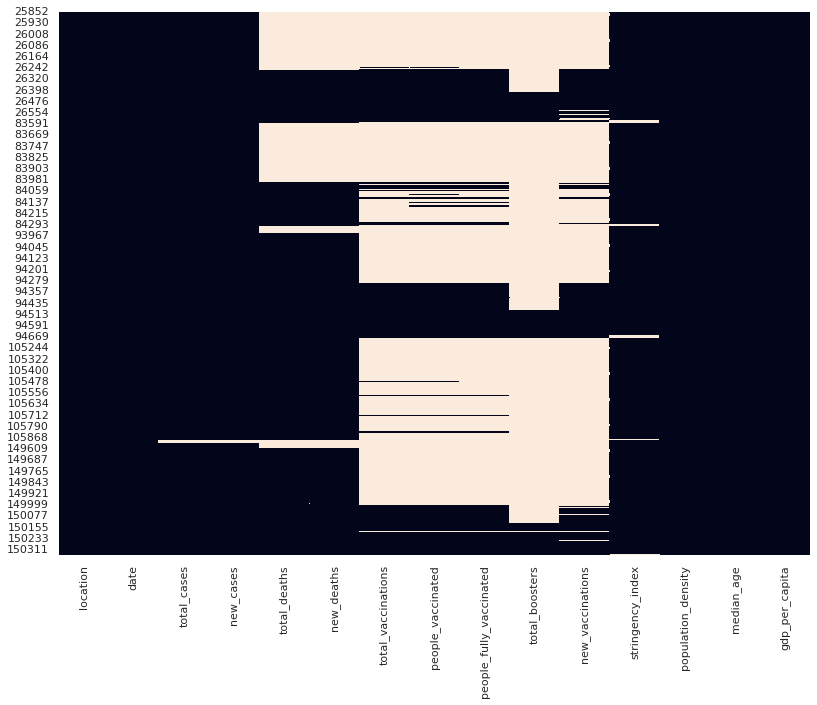

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data_df.isnull(), cbar=False)

In [ ]:
for col in data_df.columns:
    pct_missing = np.mean(data_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

location - 0%
date - 0%
total_cases - 1%
new_cases - 1%
total_deaths - 25%
new_deaths - 25%
total_vaccinations - 68%
people_vaccinated - 68%
people_fully_vaccinated - 68%
total_boosters - 84%
new_vaccinations - 71%
stringency_index - 2%
population_density - 0%
median_age - 0%
gdp_per_capita - 0%


In [ ]:
# Tranform date to datetime formats
data_df['date'] = pd.to_datetime(data_df['date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Show null value of stringency_index count by country 
data_df[data_df['stringency_index'].isna()]['location'].value_counts()

Cambodia    18
Malaysia    18
Myanmar     12
Laos        11
Thailand     5
Name: location, dtype: int64

In [ ]:
data_df[data_df['stringency_index'].isna()]['date'].value_counts()
# ถ้าดูจากข้อมูล stringency_index 
# ช่วงที่หายไปเป็นแค่ช่วงสั้นๆ
# เลยใช้ ffill แต่จะ note ไว้ว่าช่วงปลายเดือน 2 ถึง 3 ของปีล่าสุด เป็นข้อมูลที่เราเติม

2022-03-11    5
2022-03-10    5
2022-03-09    5
2022-03-08    5
2022-03-07    5
2022-03-04    4
2022-03-06    4
2022-03-05    4
2022-03-03    4
2022-03-02    4
2022-03-01    4
2022-02-28    3
2022-02-23    2
2022-02-27    2
2022-02-26    2
2022-02-25    2
2022-02-24    2
2022-02-22    2
Name: date, dtype: int64

In [ ]:
data_df.loc[data_df['location'] == 'Cambodia', 'stringency_index'] = data_df.loc[data_df['location'] == 'Cambodia', 'stringency_index'].fillna(method='ffill')
data_df.loc[data_df['location'] == 'Malaysia', 'stringency_index'] = data_df.loc[data_df['location'] == 'Malaysia', 'stringency_index'].fillna(method='ffill')
data_df.loc[data_df['location'] == 'Myanmar', 'stringency_index'] = data_df.loc[data_df['location'] == 'Myanmar', 'stringency_index'].fillna(method='ffill')
data_df.loc[data_df['location'] == 'Laos', 'stringency_index'] = data_df.loc[data_df['location'] == 'Laos', 'stringency_index'].fillna(method='ffill')
data_df.loc[data_df['location'] == 'Thailand', 'stringency_index'] = data_df.loc[data_df['location'] == 'Thailand', 'stringency_index'].fillna(method='ffill')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Null population_density by location
# data_df[data_df['population_density'].isna()]['location'].value_counts()
data_df.isnull().sum()

location                      0
date                          0
total_cases                  19
new_cases                    21
total_deaths                934
new_deaths                  937
total_vaccinations         2573
people_vaccinated          2560
people_fully_vaccinated    2587
total_boosters             3183
new_vaccinations           2670
stringency_index              0
population_density            0
median_age                    0
gdp_per_capita                0
dtype: int64

In [ ]:
# export to work on (people_vaccinated, people_fully_vaccinated : fill by previous day) (total_vaccinations, new_vaccinations : calculate)
data_df.to_csv('owid-covid-data-to-clean.csv')

## Import clean data from excel

In [ ]:
data_path = os.path.join(data_dir, 'owid-covid-data-clean22.csv')
df_clean = pd.read_csv(data_path)

In [ ]:
df_clean.isnull().sum()

Unnamed: 0                      0
location                        0
date                            0
total_cases                    19
new_cases                      20
new_cases_smoothed             57
total_deaths                  934
new_deaths                    937
new_deaths_smoothed           985
total_vaccinations            379
people_vaccinated               0
people_fully_vaccinated         0
total_boosters               3157
new_vaccinations                0
new_vaccinations_smoothed    1484
stringency_index                0
population_density              0
median_age                      0
gdp_per_capita                  0
dtype: int64

In [ ]:
df_clean = df_clean.drop(['new_cases_smoothed','new_deaths_smoothed','new_vaccinations_smoothed'], axis=1)

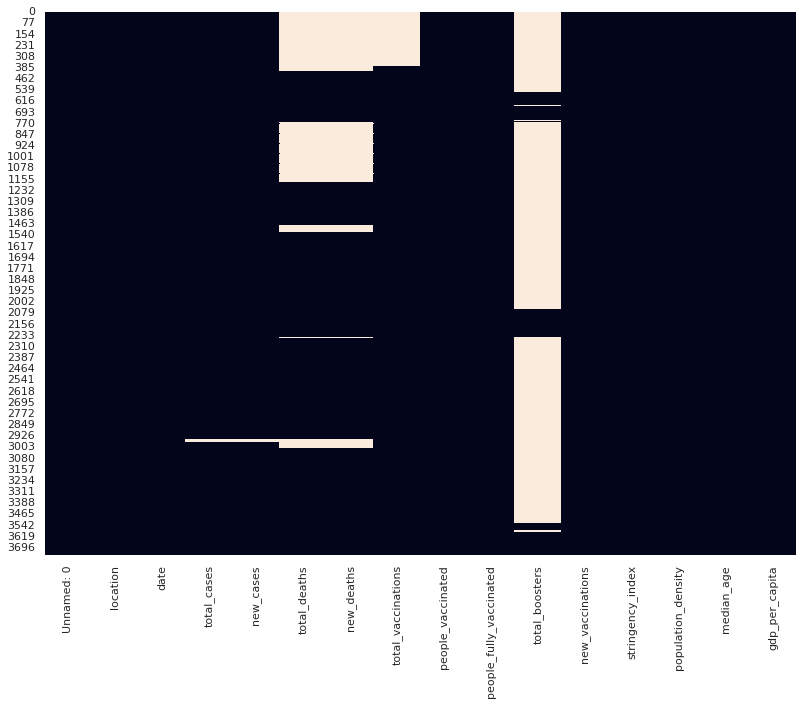

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df_clean.isnull(), cbar=False)
# จากแมพ new_deaths ที่ยังเป็น NaN อยู่จะเป็นแค่ช่วงต้นปีของแต่ละประเทศ เลยจะแทนค่าเป็น 0

In [ ]:
df_clean.isnull().sum()

Unnamed: 0                    0
location                      0
date                          0
total_cases                  19
new_cases                    20
total_deaths                934
new_deaths                  937
total_vaccinations          379
people_vaccinated             0
people_fully_vaccinated       0
total_boosters             3157
new_vaccinations              0
stringency_index              0
population_density            0
median_age                    0
gdp_per_capita                0
dtype: int64

In [ ]:
# fill total_vaccinations with previous
df_clean['total_vaccinations'].loc[0] = 0
for i in range(1, len(df_clean)):
    if (pd.isna(df_clean.loc[i].total_vaccinations)):
        df_clean['total_vaccinations'].loc[i] = df_clean.loc[i-1].total_vaccinations + df_clean.loc[i].people_vaccinated


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_clean['new_cases'] = df_clean['new_cases'].fillna(0)
df_clean['new_deaths'] = df_clean['new_deaths'].fillna(0)

In [ ]:
# fill total_deaths with previous
df_clean['total_deaths'].loc[0] = 0
for i in range(1, len(df_clean)):
    if (pd.isna(df_clean.loc[i].total_deaths)):
        df_clean['total_deaths'].loc[i] = df_clean.loc[i-1].total_deaths + df_clean.loc[i].new_deaths


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# fill total_deaths with previous
df_clean['total_cases'].loc[0] = 0
for i in range(1, len(df_clean)):
    if (pd.isna(df_clean.loc[i].total_cases)):
        df_clean['total_cases'].loc[i] = df_clean.loc[i-1].total_cases + df_clean.loc[i].new_cases


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_clean.isnull().sum()

Unnamed: 0                    0
location                      0
date                          0
total_cases                   0
new_cases                     0
total_deaths                  0
new_deaths                    0
total_vaccinations            0
people_vaccinated             0
people_fully_vaccinated       0
total_boosters             3157
new_vaccinations              0
stringency_index              0
population_density            0
median_age                    0
gdp_per_capita                0
dtype: int64

In [ ]:
index = df_clean[df_clean['location'] == 'Cambodia'].head(1).fillna(0).index
df_clean.loc[index] = df_clean[df_clean['location'] == 'Cambodia'].head(1).fillna(0)

In [ ]:
index = df_clean[df_clean['location'] == 'Malaysia'].head(1).fillna(0).index
df_clean.loc[index] = df_clean[df_clean['location'] == 'Malaysia'].head(1).fillna(0)

In [ ]:
index = df_clean[df_clean['location'] == 'Myanmar'].head(1).fillna(0).index
df_clean.loc[index] = df_clean[df_clean['location'] == 'Myanmar'].head(1).fillna(0)

In [ ]:
index = df_clean[df_clean['location'] == 'Laos'].head(1).fillna(0).index
df_clean.loc[index] = df_clean[df_clean['location'] == 'Laos'].head(1).fillna(0)

In [ ]:
index = df_clean[df_clean['location'] == 'Thailand'].head(1).fillna(0).index
df_clean.loc[index] = df_clean[df_clean['location'] == 'Thailand'].head(1).fillna(0)

In [ ]:
# use previous column to fill NaN
df_clean['total_boosters'] = df_clean['total_boosters'].fillna(method='ffill')

In [ ]:
df_clean['date'] = pd.to_datetime(df_clean['date'])

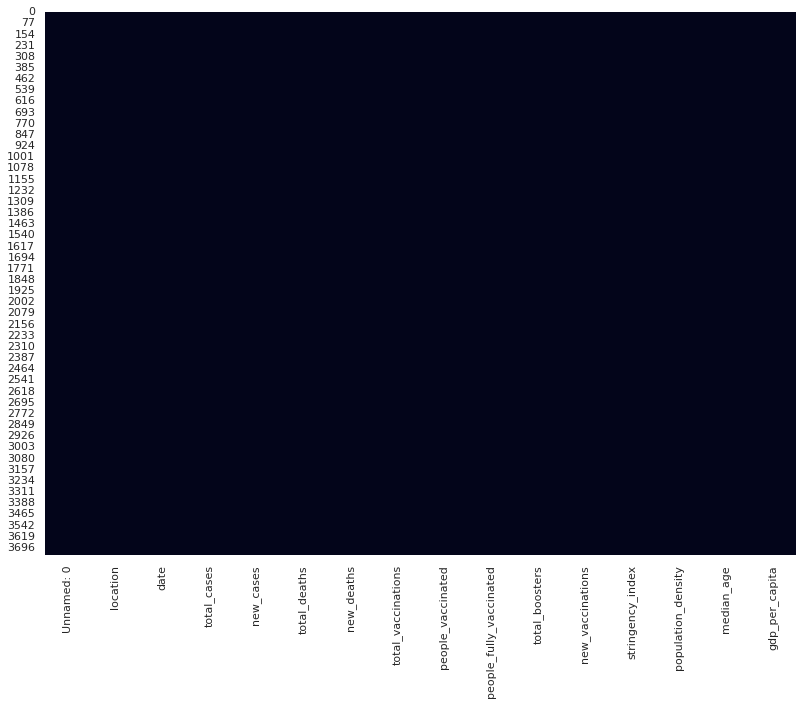

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df_clean.isnull(), cbar=False)

In [ ]:
df_clean.to_csv('new_data_clean.csv')

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3751 entries, 0 to 3750
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               3751 non-null   int64         
 1   location                 3751 non-null   object        
 2   date                     3751 non-null   datetime64[ns]
 3   total_cases              3751 non-null   float64       
 4   new_cases                3751 non-null   float64       
 5   total_deaths             3751 non-null   float64       
 6   new_deaths               3751 non-null   float64       
 7   total_vaccinations       3751 non-null   float64       
 8   people_vaccinated        3751 non-null   int64         
 9   people_fully_vaccinated  3751 non-null   int64         
 10  total_boosters           3751 non-null   float64       
 11  new_vaccinations         3751 non-null   int64         
 12  stringency_index         3751 non-

## Datavisualization

In [ ]:
data_2020 = df_clean[df_clean['date'] < '2021-01-01']
data_2021 = df_clean[(df_clean['date'] >= '2021-01-01') & (df_clean['date'] < '2022-01-01') ]
data_2022 = df_clean[(df_clean['date'] >= '2022-01-01')]
data_2022['date'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                     317
unique                     70
top       2022-01-01 00:00:00
freq                        5
first     2022-01-01 00:00:00
last      2022-03-11 00:00:00
Name: date, dtype: object

2020

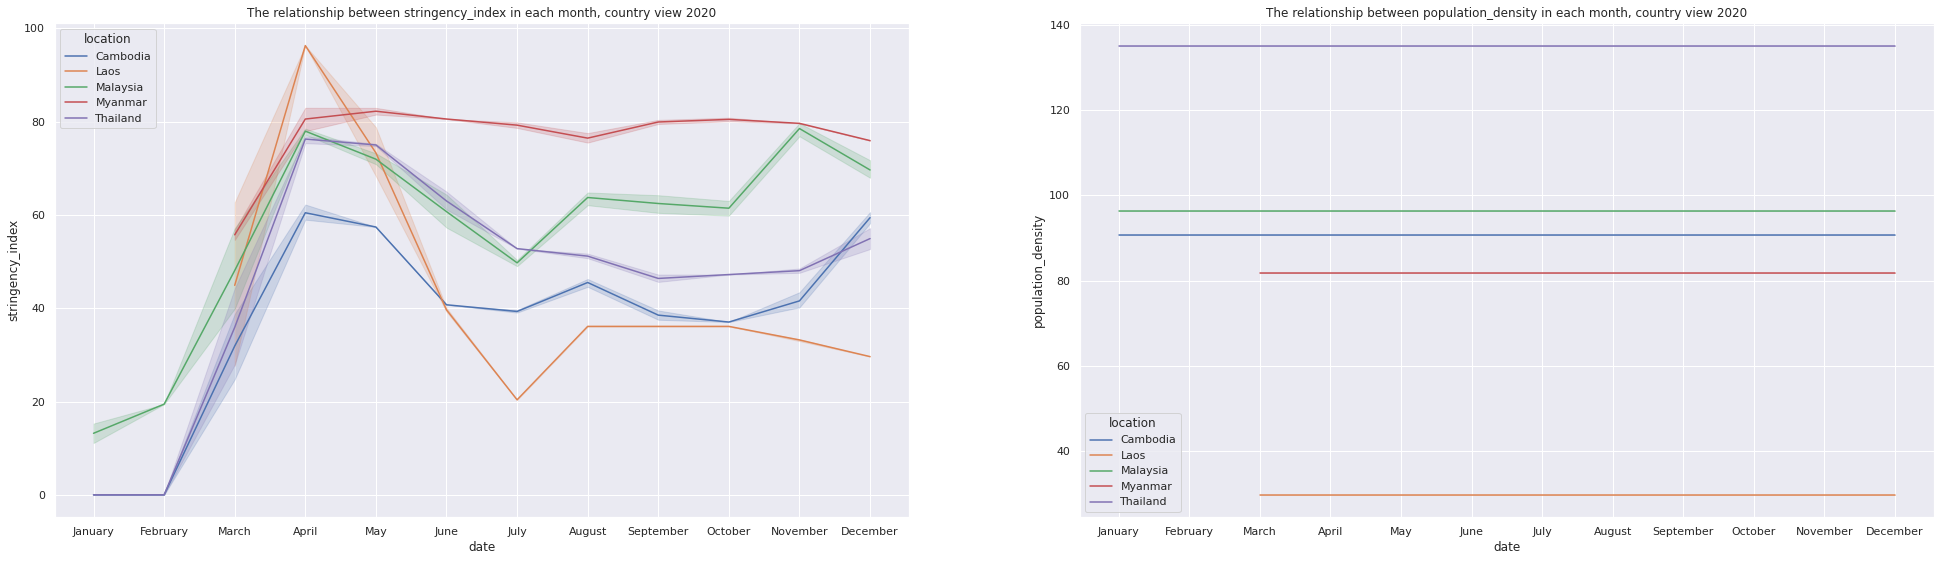

In [ ]:
frame2020 = plt.figure(figsize=(30, 20))

frame2020.add_subplot(221)
sn = sns.lineplot(x =data_2020['date'].dt.strftime('%B'), y = data_2020['stringency_index'] , hue = data_2020['location']).set_title('The relationship between stringency_index in each month, country view 2020')
frame2020.add_subplot(222)
sn = sns.lineplot(x =data_2020['date'].dt.strftime('%B'), y = data_2020['population_density'] , hue = data_2020['location']).set_title('The relationship between population_density in each month, country view 2020')

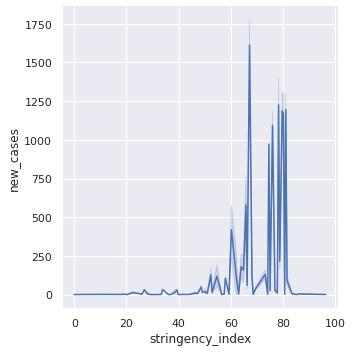

In [ ]:
sns.relplot(y='new_cases', x='stringency_index',kind='line' ,data=data_2020)

In [ ]:
%pip install chart_studio

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
df_test = df_clean.set_index('date')
df_country = df_test.groupby(['location']).resample('D').mean().reset_index()

In [ ]:
#call Bar charts and assign to fig_t. Add traces to the same figure
fig_t = go.Figure(go.Bar(x=data_2022['date'], y=data_2022['new_cases'], name='Total Infected', marker_color='indianred', opacity=1))
# fig_t.add_trace(go.Bar(x=data_2021['date'], y=y-z-w, name='Case Transform', marker_color='mediumblue', opacity=0.7))
fig_t.add_trace(go.Bar(x=data_2022['date'], y=data_2022['new_vaccinations'], name='Total Vaccinatedn', marker_color='lightseagreen', opacity=0.3))
fig_t.add_trace(go.Bar(x=data_2022['date'], y=data_2022['new_deaths'], name='Total deaths', marker_color='gray', opacity=1))

#here we define layout of the chart
fig_t.update_layout(barmode='overlay', xaxis={'categoryorder':'total ascending'},xaxis_type='category',
                  title={
        'text': 'Cummulative COVID-19 world trend',
        'y':0.79,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'},)
fig_t.update_xaxes(title= '----->Timeline' ,showline=True)
fig_t.update_yaxes(title= '----->Number of cases', showline=True)
fig_t.show()

In [ ]:
#call Line charts and assign to fig_inc. Add traces to the same figure
fig_inc = go.Figure(go.Line(x=data_2022['date'], y=data_2022['new_cases'],name='Infected', mode='lines+markers',marker=dict(size=10,color='indianred')))
fig_inc.add_trace(go.Line(x=data_2022['date'], y=data_2022['new_deaths'], name='Deaths', mode='lines+markers',marker=dict(size=10,color='gray')))
fig_inc.add_trace(go.Line(x=data_2022['date'], y=data_2022['new_vaccinations'], name='Active', mode='lines+markers',marker=dict(size=10,color='Orange')))
#here we define layout of the chart
fig_inc.update_layout(xaxis_showgrid=True, yaxis_showgrid=True, plot_bgcolor='whitesmoke', 
        title={
        'text': 'Incremental COVID-19 world trend',
        'y':0.75,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},xaxis_type='category')
fig_inc.update_xaxes(title= '------>Timeline' ,showline=False)
fig_inc.update_yaxes(title= '------>Number of incremental cases', showline=False)

fig_inc.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
Thailand = df_country[df_country['location'] == 'Thailand'].append(df_country[df_country['location'] == 'Malaysia'])
figie = px.line(Thailand, x='date',
y='new_vaccinations', color='location', title='compare new_vaccinations between Thailand and Malaysia')
figie.show()

In [ ]:
Thailand = df_country[df_country['location'] == 'Thailand'].append(df_country[df_country['location'] == 'Malaysia'])
figie = px.line(Thailand, x='date',
y='new_cases', color='location', title='compare new_cases between Thailand and Malaysia')
figie.show()

In [ ]:
Thailand = df_country[df_country['location'] == 'Thailand'].append(df_country[df_country['location'] == 'Malaysia'])
figie = px.line(Thailand, x='date',
y='new_deaths', color='location', title='compare deaths report between Thailand and Malaysia')
figie.show()

In [ ]:
figie = px.line(Thailand, x='date',
y='stringency_index', color='location', title='compare the stringency index between Thailand and Malaysia')
figie.show()

In [ ]:
figgiee = px.bar(df_country, y='new_deaths', x='location', color='location')
# figgiee.update_traces(texttemplate='%{text:.2s}', textposition='outside')
figgiee.update_layout(uniformtext_minsize=8)
figgiee.update_layout(xaxis_tickangle=-45)
figgiee

2021

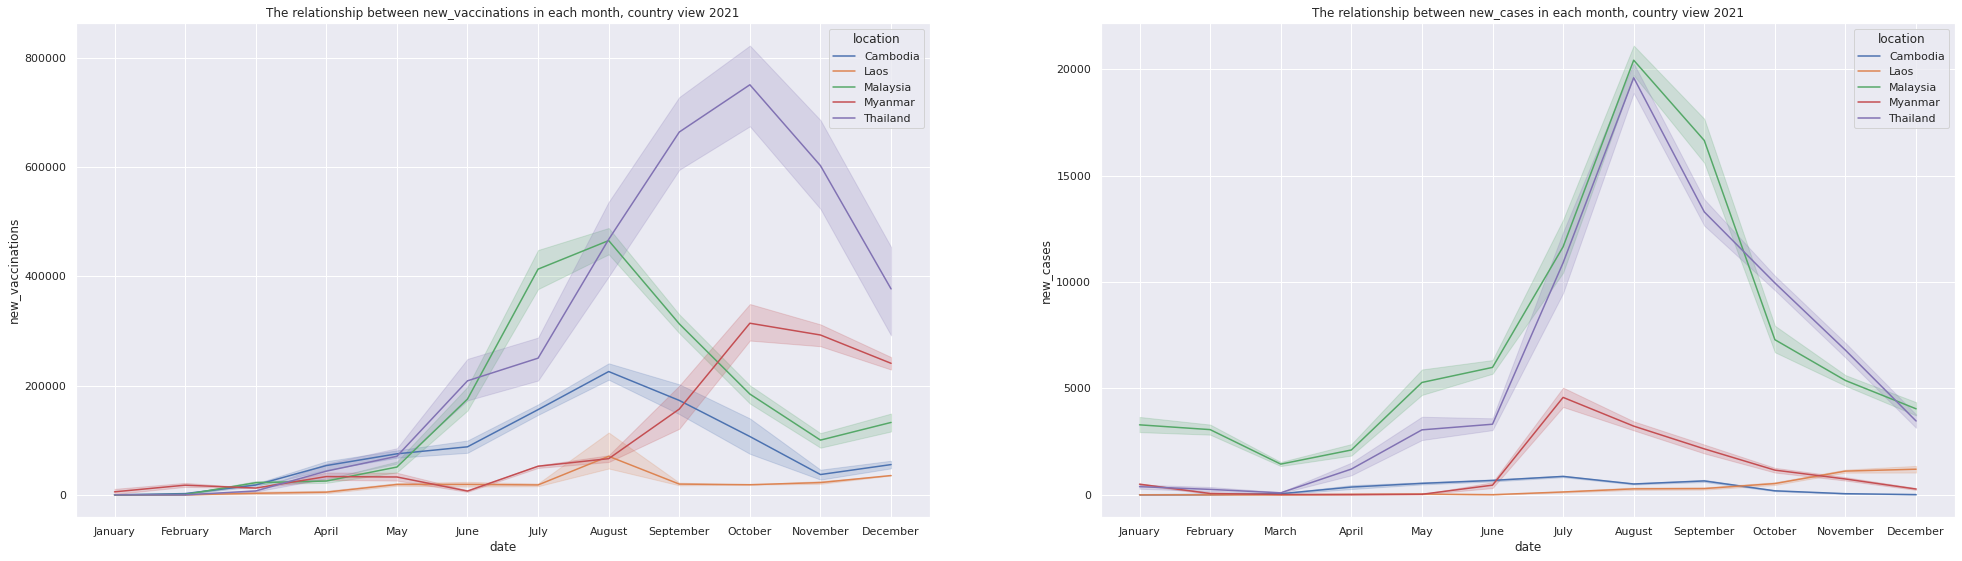

In [ ]:

frame2021 = plt.figure(figsize=(30, 20))

frame2021.add_subplot(221)
sn = sns.lineplot(x =data_2021['date'].dt.strftime('%B'), y = data_2021['new_vaccinations'] , hue = data_2021['location']).set_title('The relationship between new_vaccinations in each month, country view 2021')
frame2021.add_subplot(222)
sn = sns.lineplot(x =data_2021['date'].dt.strftime('%B'), y = data_2021['new_cases'] , hue = data_2021['location']).set_title('The relationship between new_cases in each month, country view 2021')

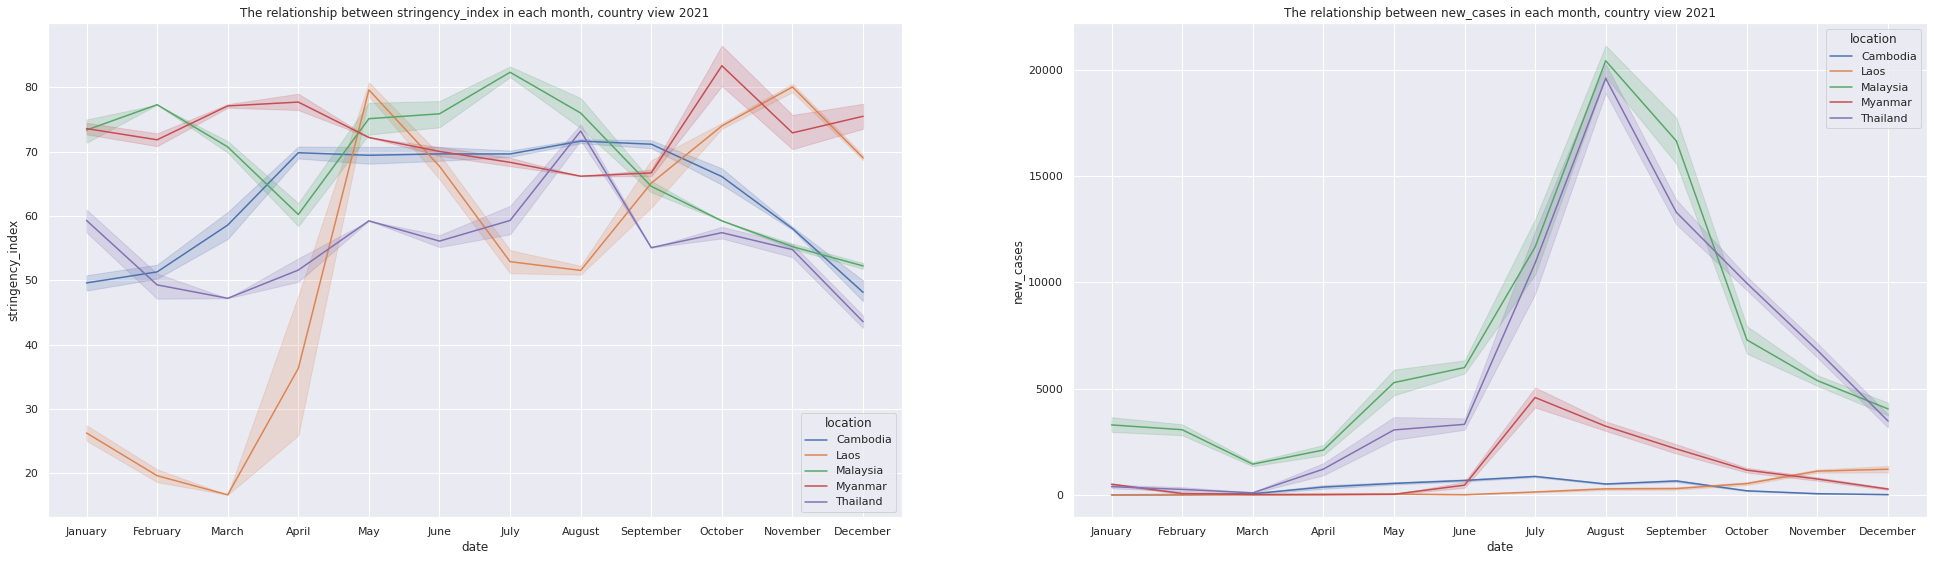

In [ ]:
frame2020 = plt.figure(figsize=(30, 20))

frame2020.add_subplot(221)
# sn = sns.histplot(x=data_2021['date'].dt.strftime('%B'), data=data_2021, kde=True, y=data_2021['stringency_index'], hue=data_2021['location'])
sn = sns.lineplot(x =data_2021['date'].dt.strftime('%B'), y = data_2021['stringency_index'] , hue = data_2021['location']).set_title('The relationship between stringency_index in each month, country view 2021')
frame2020.add_subplot(222)
sn = sns.lineplot(x =data_2021['date'].dt.strftime('%B'), y = data_2021['new_cases'] , hue = data_2021['location']).set_title('The relationship between new_cases in each month, country view 2021')


2022

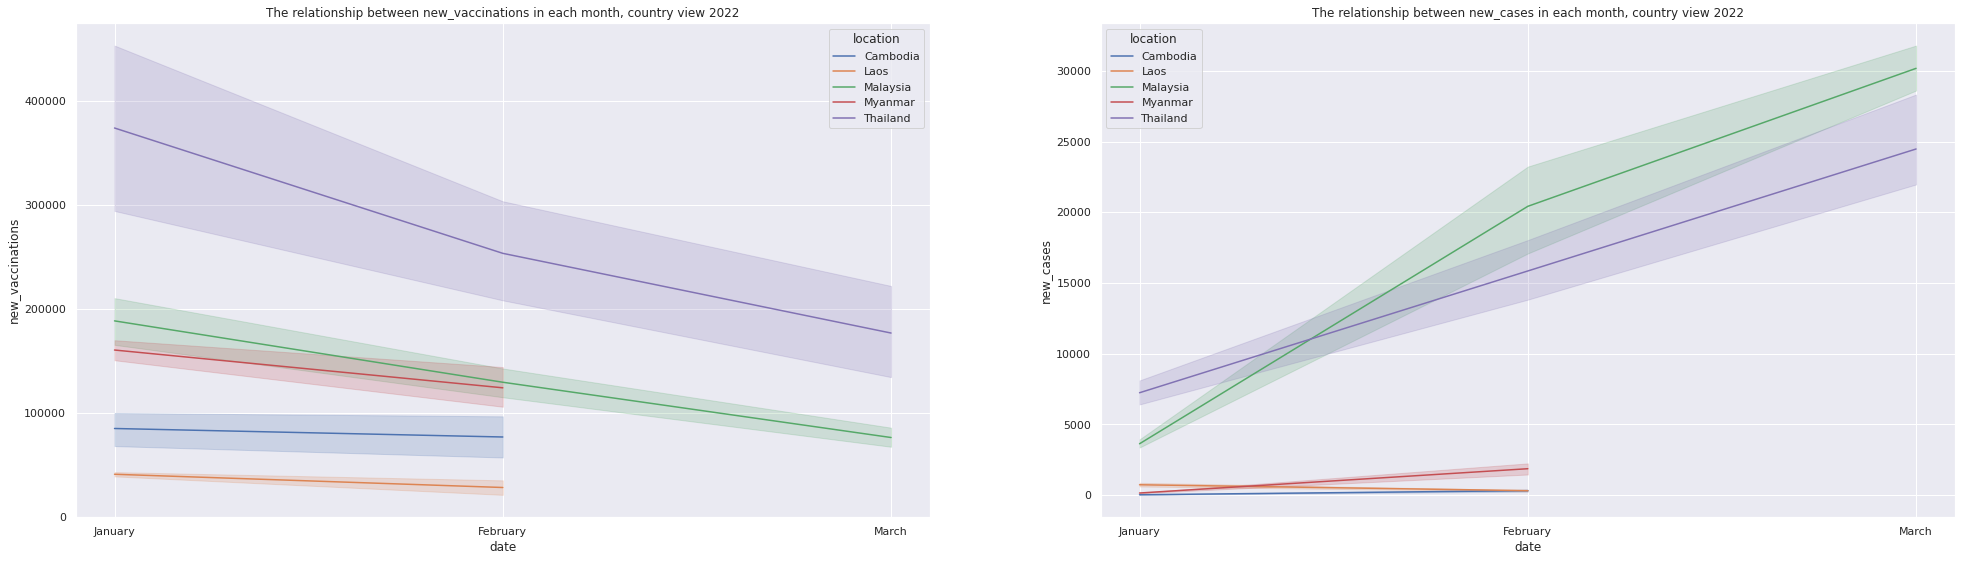

In [ ]:

frame2022 = plt.figure(figsize=(30, 20))

frame2022.add_subplot(221)
sn = sns.lineplot(x =data_2022['date'].dt.strftime('%B'), y = data_2022['new_vaccinations'] , hue = data_2022['location']).set_title('The relationship between new_vaccinations in each month, country view 2022')
frame2022.add_subplot(222)
sn = sns.lineplot(x =data_2022['date'].dt.strftime('%B'), y = data_2022['new_cases'] , hue = data_2022['location']).set_title('The relationship between new_cases in each month, country view 2022')


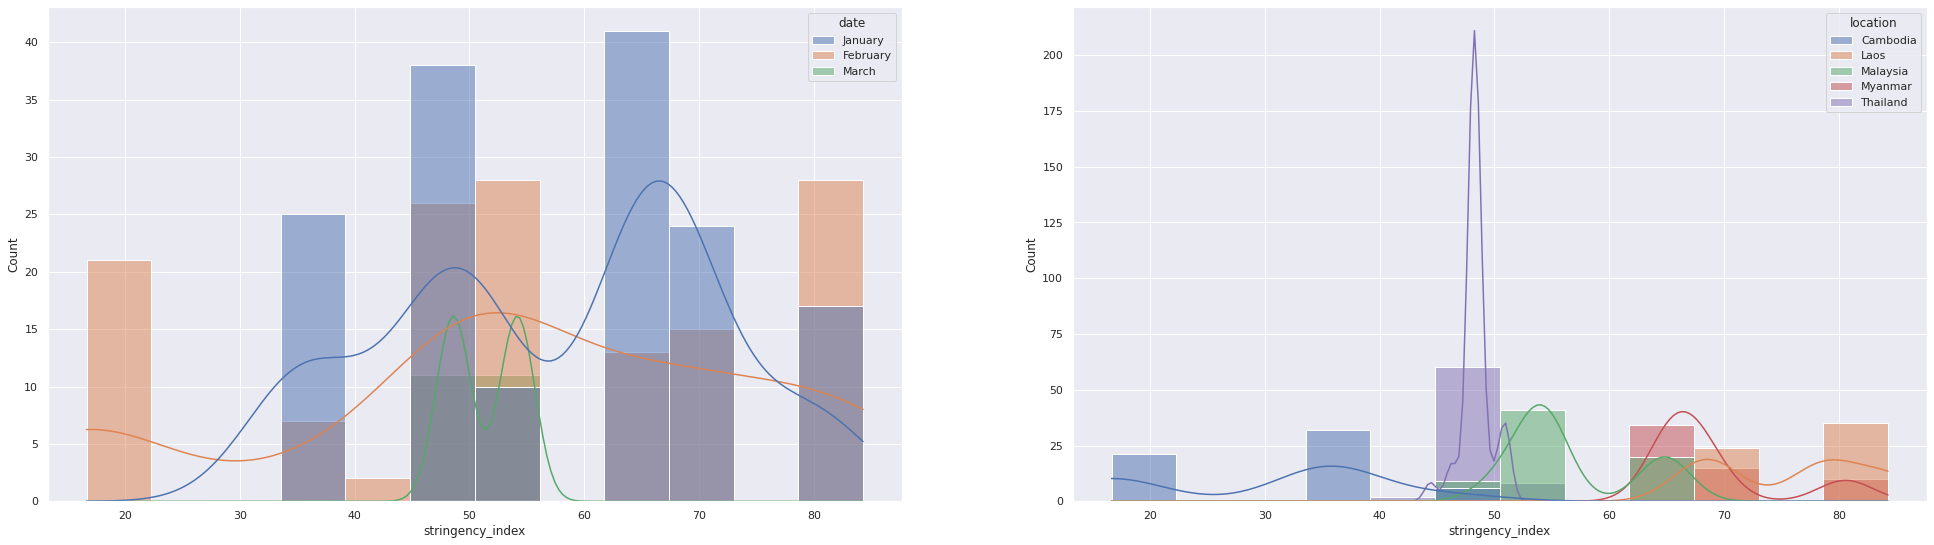

In [ ]:
frame2020 = plt.figure(figsize=(30, 20))

frame2020.add_subplot(221)
sn = sns.histplot(x='stringency_index', data=data_2022, kde=True, hue=data_2022['date'].dt.strftime('%B'))
frame2020.add_subplot(222)
sn = sns.histplot(x='stringency_index', data=data_2022, kde=True, hue=data_2022['location'])

plt.show()

## Prepare for Next step

In [ ]:
dataframe = df_clean
dataframe

,Unnamed: 0,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,stringency_index,population_density,median_age,gdp_per_capita
0,25852,Cambodia,2020-01-27,0.0,1.0,0.0,0.0,0.0,0,0,0.0,0,0.00,90.672,25.6,3645.070
1,25853,Cambodia,2020-01-28,1.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.00,90.672,25.6,3645.070
2,25854,Cambodia,2020-01-29,1.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.00,90.672,25.6,3645.070
3,25855,Cambodia,2020-01-30,1.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.00,90.672,25.6,3645.070
4,25856,Cambodia,2020-01-31,1.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.00,90.672,25.6,3645.070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,150346,Thailand,2022-03-07,3066800.0,18943.0,23369.0,69.0,124950678.0,53989200,49796832,21164646.0,138219,48.61,135.132,40.1,16277.671
3747,150347,Thailand,2022-03-08,3088873.0,22073.0,23438.0,69.0,125104784.0,54042657,49812870,21249257.0,154106,48.61,135.132,40.1,16277.671
3748,150348,Thailand,2022-03-09,3111857.0,22984.0,23512.0,74.0,125283740.0,54112638,49830021,21341081.0,178956,48.61,135.132,40.1,16277.671
3749,150349,Thailand,2022-03-10,3136649.0,24792.0,23575.0,63.0,125497170.0,54207124,49849223,21440823.0,213430,48.61,135.132,40.1,16277.671


In [ ]:
dataframe = dataframe.drop(columns=['Unnamed: 0'])
# drop a suspicious row that contain new_cases = 0 in row index 3739
dataframe.drop([3739], axis=0, inplace=True)
dataframe

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,stringency_index,population_density,median_age,gdp_per_capita
0,Cambodia,2020-01-27,0.0,1.0,0.0,0.0,0.0,0,0,0.0,0,0.00,90.672,25.6,3645.070
1,Cambodia,2020-01-28,1.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.00,90.672,25.6,3645.070
2,Cambodia,2020-01-29,1.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.00,90.672,25.6,3645.070
3,Cambodia,2020-01-30,1.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.00,90.672,25.6,3645.070
4,Cambodia,2020-01-31,1.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.00,90.672,25.6,3645.070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,Thailand,2022-03-07,3066800.0,18943.0,23369.0,69.0,124950678.0,53989200,49796832,21164646.0,138219,48.61,135.132,40.1,16277.671
3747,Thailand,2022-03-08,3088873.0,22073.0,23438.0,69.0,125104784.0,54042657,49812870,21249257.0,154106,48.61,135.132,40.1,16277.671
3748,Thailand,2022-03-09,3111857.0,22984.0,23512.0,74.0,125283740.0,54112638,49830021,21341081.0,178956,48.61,135.132,40.1,16277.671
3749,Thailand,2022-03-10,3136649.0,24792.0,23575.0,63.0,125497170.0,54207124,49849223,21440823.0,213430,48.61,135.132,40.1,16277.671


## Select Thailand for predicting

In [ ]:
filter_country = dataframe[dataframe['location'] == 'Thailand']
filter_country

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,stringency_index,population_density,median_age,gdp_per_capita
2953,Thailand,2020-01-04,587891.0,0.0,19368.0,0.0,0.0,0,0,0.0,0,0.00,135.132,40.1,16277.671
2954,Thailand,2020-01-05,587891.0,0.0,19368.0,0.0,0.0,0,0,0.0,0,0.00,135.132,40.1,16277.671
2955,Thailand,2020-01-06,587891.0,0.0,19368.0,0.0,0.0,0,0,0.0,0,0.00,135.132,40.1,16277.671
2956,Thailand,2020-01-07,587891.0,0.0,19368.0,0.0,0.0,0,0,0.0,0,0.00,135.132,40.1,16277.671
2957,Thailand,2020-01-08,587891.0,0.0,19368.0,0.0,0.0,0,0,0.0,0,0.00,135.132,40.1,16277.671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,Thailand,2022-03-07,3066800.0,18943.0,23369.0,69.0,124950678.0,53989200,49796832,21164646.0,138219,48.61,135.132,40.1,16277.671
3747,Thailand,2022-03-08,3088873.0,22073.0,23438.0,69.0,125104784.0,54042657,49812870,21249257.0,154106,48.61,135.132,40.1,16277.671
3748,Thailand,2022-03-09,3111857.0,22984.0,23512.0,74.0,125283740.0,54112638,49830021,21341081.0,178956,48.61,135.132,40.1,16277.671
3749,Thailand,2022-03-10,3136649.0,24792.0,23575.0,63.0,125497170.0,54207124,49849223,21440823.0,213430,48.61,135.132,40.1,16277.671


In [ ]:
filter_country = filter_country.drop(columns=['location'])
filter_country

,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,stringency_index,population_density,median_age,gdp_per_capita
2953,2020-01-04,587891.0,0.0,19368.0,0.0,0.0,0,0,0.0,0,0.00,135.132,40.1,16277.671
2954,2020-01-05,587891.0,0.0,19368.0,0.0,0.0,0,0,0.0,0,0.00,135.132,40.1,16277.671
2955,2020-01-06,587891.0,0.0,19368.0,0.0,0.0,0,0,0.0,0,0.00,135.132,40.1,16277.671
2956,2020-01-07,587891.0,0.0,19368.0,0.0,0.0,0,0,0.0,0,0.00,135.132,40.1,16277.671
2957,2020-01-08,587891.0,0.0,19368.0,0.0,0.0,0,0,0.0,0,0.00,135.132,40.1,16277.671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,2022-03-07,3066800.0,18943.0,23369.0,69.0,124950678.0,53989200,49796832,21164646.0,138219,48.61,135.132,40.1,16277.671
3747,2022-03-08,3088873.0,22073.0,23438.0,69.0,125104784.0,54042657,49812870,21249257.0,154106,48.61,135.132,40.1,16277.671
3748,2022-03-09,3111857.0,22984.0,23512.0,74.0,125283740.0,54112638,49830021,21341081.0,178956,48.61,135.132,40.1,16277.671
3749,2022-03-10,3136649.0,24792.0,23575.0,63.0,125497170.0,54207124,49849223,21440823.0,213430,48.61,135.132,40.1,16277.671


In [ ]:
filter_country = filter_country[["date","new_cases","total_cases","total_deaths","people_fully_vaccinated","stringency_index","population_density"]]
filter_country

,date,new_cases,total_cases,total_deaths,people_fully_vaccinated,stringency_index,population_density
2953,2020-01-04,0.0,587891.0,19368.0,0,0.00,135.132
2954,2020-01-05,0.0,587891.0,19368.0,0,0.00,135.132
2955,2020-01-06,0.0,587891.0,19368.0,0,0.00,135.132
2956,2020-01-07,0.0,587891.0,19368.0,0,0.00,135.132
2957,2020-01-08,0.0,587891.0,19368.0,0,0.00,135.132
...,...,...,...,...,...,...,...
3746,2022-03-07,18943.0,3066800.0,23369.0,49796832,48.61,135.132
3747,2022-03-08,22073.0,3088873.0,23438.0,49812870,48.61,135.132
3748,2022-03-09,22984.0,3111857.0,23512.0,49830021,48.61,135.132
3749,2022-03-10,24792.0,3136649.0,23575.0,49849223,48.61,135.132


- copy new dataframe to be dataset for first two models
- assign date to be integer

In [ ]:
filter_country2 = filter_country.drop(columns=['date'])
result_t = []
for k in range(0,797):
    result_t += [k]

In [ ]:
filter_country2['Date'] = result_t
filter_country2

,new_cases,total_cases,total_deaths,people_fully_vaccinated,stringency_index,population_density,Date
2953,0.0,587891.0,19368.0,0,0.00,135.132,0
2954,0.0,587891.0,19368.0,0,0.00,135.132,1
2955,0.0,587891.0,19368.0,0,0.00,135.132,2
2956,0.0,587891.0,19368.0,0,0.00,135.132,3
2957,0.0,587891.0,19368.0,0,0.00,135.132,4
...,...,...,...,...,...,...,...
3746,18943.0,3066800.0,23369.0,49796832,48.61,135.132,792
3747,22073.0,3088873.0,23438.0,49812870,48.61,135.132,793
3748,22984.0,3111857.0,23512.0,49830021,48.61,135.132,794
3749,24792.0,3136649.0,23575.0,49849223,48.61,135.132,795


# 3. Train model

## 1st: Multiple linear regression


- Split Data into Training, Validation, and Test Sets

In [ ]:
X = filter_country2.drop(columns=['new_cases']).values
y = filter_country2['new_cases'].values

In [ ]:
#split training, validation, test into 80/10/10. #we don't need random split, so shuffle=False
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    shuffle=False)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_test, y_test,
    test_size=0.50,
    shuffle=False)

print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Validation set: {X_valid.shape}, {y_valid.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')

Training set: (637, 6), (637,)
Validation set: (80, 6), (80,)
Test set: (80, 6), (80,)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model = model.fit(X_train, y_train)

In [ ]:
#Intercept and Coefficient
print("Intercept: ", model.intercept_)
print('Coefficients: ', model.coef_)

Intercept:  -6972.962237607351
Coefficients:  [ 1.26322714e-02  2.35973000e-01 -7.40536289e-04  8.44397566e+01
 -6.25966530e-29  1.00588525e+01]


In [ ]:
y_hat_train = model.predict(X_train)
y_hat_valid = model.predict(X_valid)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('Training Set')
r2_score(y_train,y_hat_train)

print('MSE: {}'.format(mean_squared_error(y_train,y_hat_train)))
# R2: 1 means perfect prediction
print('R2: {}'.format(r2_score(y_train,y_hat_train)))
print('')

print('Validation Set')
print('MSE: {}'.format(mean_squared_error(y_valid,y_hat_valid)))
# R2: 1 means perfect prediction
print('R2: {}'.format(r2_score(y_valid,y_hat_valid)))

Training Set
MSE: 5854995.107479992
R2: 0.797397373520891

Validation Set
MSE: 4193194.2385182334
R2: 0.33726437129246056


In [ ]:
y_hat_test = model.predict(X_test)
print('Test Set')

print('MSE: {}'.format(mean_squared_error(y_test,y_hat_test)))
# R2: 1 means perfect prediction
print('R2: {}'.format(r2_score(y_test,y_hat_test)))

Test Set
MSE: 66735695.60499028
R2: -0.03761088410888269


In [ ]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_hat_test})
mlr_diff

,Actual value,Predicted value
0,2476.0,3681.780367
1,2532.0,3599.588205
2,2940.0,3510.714278
3,2671.0,3376.028827
4,2766.0,3393.167008
...,...,...
75,18943.0,12477.007373
76,22073.0,12770.303768
77,22984.0,13075.463811
78,24792.0,13399.348458


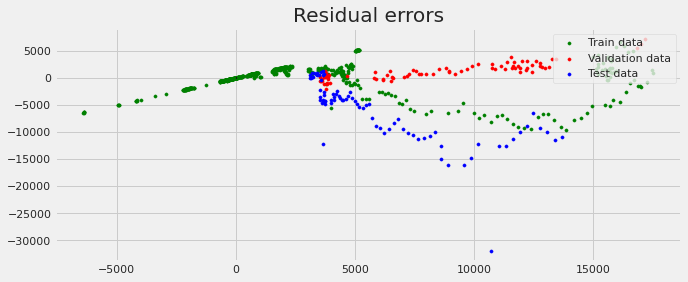

In [ ]:
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')

plt.figure(figsize=(10,4))
 
## plotting residual errors in training data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')

## plotting residual errors in training data
plt.scatter(model.predict(X_valid), model.predict(X_valid) - y_valid,
            color = "red", s = 10, label = 'Validation data')
 
## plotting residual errors in test data
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
# ## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

### 2nd: Support Vector Regression


- Split Data into Training, Validation, and Test Sets

In [ ]:
X2 = filter_country2.drop(columns=['new_cases']).values
y2 = filter_country2['new_cases'].values

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2,
    test_size=0.20,
    shuffle=False)
X2_valid, X2_test, y2_valid, y2_test = train_test_split(
    X2_test, y2_test,
    test_size=0.50,
    shuffle=False)

print(f'Training set: {X2_train.shape}, {y2_train.shape}')
print(f'Validation set: {X2_valid.shape}, {y2_valid.shape}')
print(f'Test set: {X2_test.shape}, {y2_test.shape}')

Training set: (637, 6), (637,)
Validation set: (80, 6), (80,)
Test set: (80, 6), (80,)


In [ ]:
from sklearn import svm
model2 = svm.SVR()
model2 = model2.fit(X2_train, y2_train)

In [ ]:
y2_hat_train = model2.predict(X2_train)
y2_hat_valid = model2.predict(X2_valid)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('Training Set')
r2_score(y2_train,y2_hat_train)
print('MSE: {}'.format(mean_squared_error(y2_train,y2_hat_train)))
# R2: 1 means perfect prediction
print('R2: {}'.format(r2_score(y2_train,y2_hat_train)))
print('')

print('Validation Set')
print('MSE: {}'.format(mean_squared_error(y2_valid,y2_hat_valid)))
# R2: 1 means perfect prediction
print('R2: {}'.format(r2_score(y2_valid,y2_hat_valid)))

Training Set
MSE: 34595226.934889585
R2: -0.1971118185385088

Validation Set
MSE: 56920938.708697245
R2: -7.996371729028779


In [ ]:
y2_hat_test = model2.predict(X2_test)
print('Test Set')

print('MSE: {}'.format(mean_squared_error(y2_test,y2_hat_test)))
# R2: 1 means perfect prediction
print('R2: {}'.format(r2_score(y2_test,y2_hat_test)))

Test Set
MSE: 207562020.6985643
R2: -2.227187637021632


In [ ]:
mlr_diff = pd.DataFrame({'Actual value': y2_test, 'Predicted value': y2_hat_test})
mlr_diff

,Actual value,Predicted value
0,2476.0,121.335782
1,2532.0,121.335782
2,2940.0,121.335782
3,2671.0,121.335782
4,2766.0,121.335782
...,...,...
75,18943.0,121.335782
76,22073.0,121.335782
77,22984.0,121.335782
78,24792.0,121.335782


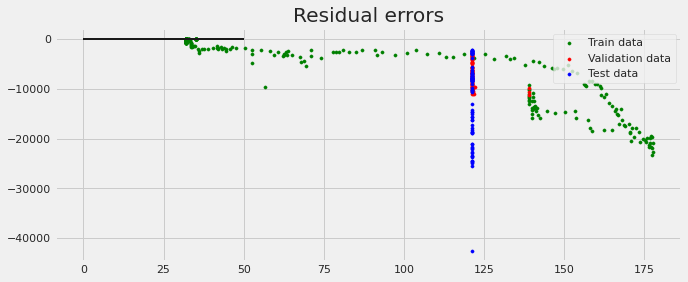

In [ ]:
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')

plt.figure(figsize=(10,4))
 
## plotting residual errors in training data
plt.scatter(model2.predict(X2_train), model2.predict(X2_train) - y2_train,
            color = "green", s = 10, label = 'Train data')

## plotting residual errors in training data
plt.scatter(model2.predict(X2_valid), model2.predict(X2_valid) - y2_valid,
            color = "red", s = 10, label = 'Validation data')
 
## plotting residual errors in test data
plt.scatter(model2.predict(X2_test), model2.predict(X2_test) - y2_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
# ## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

### 3rd: LSTM

In [ ]:
import datetime as dt
from datetime import datetime

# Extract dates (will be used in visualization)
train_dates = pd.to_datetime(filter_country['date'])
print(train_dates.tail(15)) #Check last few dates.

3735   2022-02-24
3736   2022-02-25
3737   2022-02-26
3738   2022-02-27
3740   2022-03-01
3741   2022-03-02
3742   2022-03-03
3743   2022-03-04
3744   2022-03-05
3745   2022-03-06
3746   2022-03-07
3747   2022-03-08
3748   2022-03-09
3749   2022-03-10
3750   2022-03-11
Name: date, dtype: datetime64[ns]


In [ ]:
#Variables for training
cols = list(filter_country)[1:7]
print(cols)

['new_cases', 'total_cases', 'total_deaths', 'people_fully_vaccinated', 'stringency_index', 'population_density']


In [ ]:
#New dataframe with only training data
df_for_training = filter_country[cols].astype(float)

In [ ]:
df_for_training

,new_cases,total_cases,total_deaths,people_fully_vaccinated,stringency_index,population_density
2953,0.0,587891.0,19368.0,0.0,0.00,135.132
2954,0.0,587891.0,19368.0,0.0,0.00,135.132
2955,0.0,587891.0,19368.0,0.0,0.00,135.132
2956,0.0,587891.0,19368.0,0.0,0.00,135.132
2957,0.0,587891.0,19368.0,0.0,0.00,135.132
...,...,...,...,...,...,...
3746,18943.0,3066800.0,23369.0,49796832.0,48.61,135.132
3747,22073.0,3088873.0,23438.0,49812870.0,48.61,135.132
3748,22984.0,3111857.0,23512.0,49830021.0,48.61,135.132
3749,24792.0,3136649.0,23575.0,49849223.0,48.61,135.132


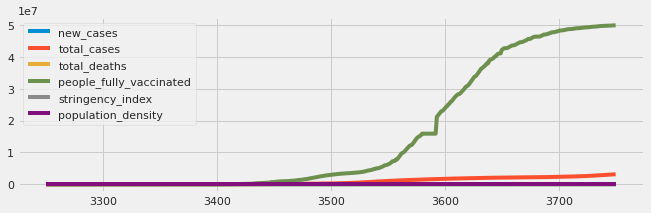

In [ ]:
df_for_plot=df_for_training.tail(500)
df_for_plot.plot.line(figsize=(10,3))

In [ ]:
# Normalize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [ ]:
#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 7   # Number of days we want to look into the future based on the past days.
n_past = 28  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (763, 28, 6).
trainY shape == (763, 1).


In [ ]:
# define the Autoencoder model
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from keras import optimizers

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_100 (LSTM)             (None, 28, 64)            18176     
                                                                 
 lstm_101 (LSTM)             (None, 32)                12416     
                                                                 
 dropout_50 (Dropout)        (None, 32)                0         
                                                                 
 dense_50 (Dense)            (None, 1)                 33        
                                                                 
Total params: 30,625
Trainable params: 30,625
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 25
batch_size = 32
learning_rate = 0.0001

In [ ]:
optimizer = keras.optimizers.Adam(lr=learning_rate)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [ ]:
model.compile(
    loss='mse',
    optimizer=optimizer)

In [ ]:
# fit the model
history = model.fit(trainX, trainY, epochs=epochs, 
                    batch_size=batch_size, 
                    validation_split=0.2, verbose=1)

Epoch 1/25
20/20 [==============================] - 7s 117ms/step - loss: 0.7464 - val_loss: 1.5293
Epoch 2/25
20/20 [==============================] - 1s 61ms/step - loss: 0.6538 - val_loss: 1.4234
Epoch 3/25
20/20 [==============================] - 1s 64ms/step - loss: 0.5775 - val_loss: 1.2982
Epoch 4/25
20/20 [==============================] - 1s 70ms/step - loss: 0.5078 - val_loss: 1.1438
Epoch 5/25
20/20 [==============================] - 1s 61ms/step - loss: 0.4404 - val_loss: 0.9562
Epoch 6/25
20/20 [==============================] - 1s 60ms/step - loss: 0.3588 - val_loss: 0.7628
Epoch 7/25
20/20 [==============================] - 1s 73ms/step - loss: 0.2611 - val_loss: 0.9248
Epoch 8/25
20/20 [==============================] - 1s 64ms/step - loss: 0.2214 - val_loss: 0.7467
Epoch 9/25
20/20 [==============================] - 1s 53ms/step - loss: 0.2098 - val_loss: 0.7600
Epoch 10/25
20/20 [==============================] - 1s 70ms/step - loss: 0.1834 - val_loss: 0.7782
Epoch 11

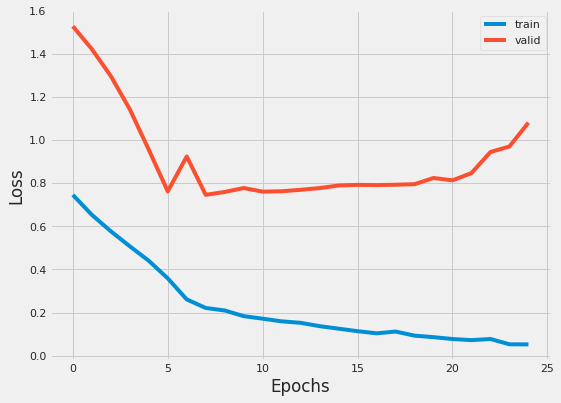

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(history.history['loss'], label='train')
ax.plot(history.history['val_loss'], label='valid')
ax.set_ylabel('Loss')
ax.set_xlabel('Epochs')
plt.legend()
plt.show()

- Test model

In [ ]:
# Generate list of sequence of days for predictions
datelist_future = pd.date_range(list(train_dates)[-1], periods=n_future, freq='1d').tolist()

# Convert Pandas Timestamp to Datetime object (for transformation) --> FUTURE
datelist_future_ = []
for this_timestamp in datelist_future:
    datelist_future_.append(this_timestamp.date())

In [ ]:
prediction_future = model.predict(trainX[-n_future:])
prediction_train = model.predict(trainX[n_past:])

In [ ]:
#Perform inverse transformation to rescale back to original range
prediction_copies = np.repeat(prediction_future, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

training_copies = np.repeat(prediction_train, df_for_training.shape[1], axis=-1)
y_pred_train = scaler.inverse_transform(training_copies)[:,0]

PREDICTIONS_FUTURE = pd.DataFrame({'date':np.array(datelist_future_), 'new_cases':y_pred_future})
PREDICTIONS_TRAIN = pd.DataFrame({'date':np.array(train_dates[(2 * n_past + n_future -1):]), 'new_cases':y_pred_train})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-pa

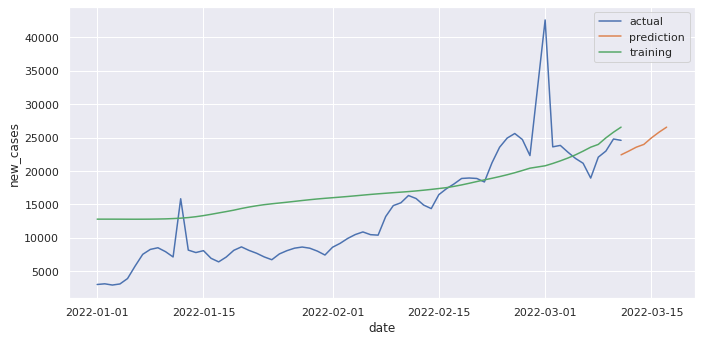

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})

original = filter_country[['date', 'new_cases']]
original['date']=pd.to_datetime(original['date'])
original = original.loc[original['date'] >= '2022-1-1']
PREDICTIONS_FUTURE['date']=pd.to_datetime(PREDICTIONS_FUTURE['date'])
PREDICTIONS_TRAIN['date']=pd.to_datetime(PREDICTIONS_TRAIN['date'])
PREDICTIONS_FUTURE = PREDICTIONS_FUTURE.loc[PREDICTIONS_FUTURE['date'] >= '2022-1-1']
PREDICTIONS_TRAIN = PREDICTIONS_TRAIN.loc[PREDICTIONS_TRAIN['date'] >= '2022-1-1']

sns.lineplot(original['date'], original['new_cases'], label='actual')
sns.lineplot(PREDICTIONS_FUTURE['date'], PREDICTIONS_FUTURE['new_cases'], label='prediction')
sns.lineplot(PREDICTIONS_TRAIN['date'], PREDICTIONS_TRAIN['new_cases'], label='training')

### Test Evaluation


In [ ]:
y_pred_actual = filter_country[['new_cases']].tail(n_future)
y_pred_actual = y_pred_actual.values
y_pred_date_results = filter_country[['date']].tail(n_future)
y_pred_date_results = y_pred_date_results.values

y_train_actual = filter_country[['new_cases']]
y_train_actual = y_train_actual[(2 * n_past + n_future -1):]
y_train_actual = y_train_actual.values
y_train_date_results = filter_country[['date']].head((2 * n_past + n_future -1))
y_train_date_results = y_train_date_results.values

In [ ]:
y_pred_actual = y_pred_actual.ravel()
y_pred_date_results = y_pred_date_results.ravel()

y_train_actual = y_train_actual.ravel()
y_train_date_results = y_train_date_results.ravel()

In [ ]:
print('Training Set')

print('MSE: {}'.format(mean_squared_error(y_train_actual,y_pred_train)))
# R2: 1 means perfect prediction
print('R2: {}'.format(r2_score(y_train_actual,y_pred_train)))

Training Set
MSE: 9664175.974286636
R2: 0.7666557862010589


In [ ]:
print('Test Set')

print('MSE: {}'.format(mean_squared_error(y_pred_actual,y_pred_future)))
# R2: 1 means perfect prediction
print('R2: {}'.format(r2_score(y_pred_actual,y_pred_future)))

Test Set
MSE: 5354643.97316415
R2: -0.5170503213776185


In [ ]:
test_results = pd.DataFrame(data={'Date': y_pred_date_results, 'Predictions':y_pred_future, 'Actual':y_pred_actual})
test_results

,Date,Predictions,Actual
0,2022-03-05,22422.583984,21881.0
1,2022-03-06,22976.056641,21162.0
2,2022-03-07,23567.642578,18943.0
3,2022-03-08,23982.613281,22073.0
4,2022-03-09,24962.351562,22984.0
5,2022-03-10,25812.644531,24792.0
6,2022-03-11,26569.083984,24592.0


# 5. Conclusion

### **Data preparation**
- Filter only Thailand, Malaysia, Cambodia, Laos, and Myanmar.
- Transform the date column to the DateTime format. 
- Filling null value by both manual and fill with code

### **Our goal**
- To predict the new cases of each country

### **Model selection**
- Multiple linear regression
- Support Vector Machine (SVM)
- Long Short Term Model (LSTM)

### **Model Evaluation**
We use 2 main metric for model evaluation in regression\
MSE(Mean square error):\
R2(R square):

Multiple linear regression
  - R2: 0.537653102918492

Support Vector Machine
  - R2: -2.227133343367012

Long short term model
  - The best MSE value (about 21)


### **Best model**
- According to the Model Evaluation, long short term model is predict the best value of stringency.

### **Why we want to predict stringency_index**
- To estimate how much of each country should prepare for COVID-policies in the future



